In [128]:
#import libraries
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime, timedelta
import os
import csv
import scipy.stats as st
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [2]:
# url for GET requests to retrieve vaccination data
url="https://data.cdc.gov/resource/unsk-b7fc.json"
query_url="https://data.cdc.gov/resource/unsk-b7fc.json?$query=SELECT%0A%20%20%60date%60%2C%0A%20%20%60mmwr_week%60%2C%0A%20%20%60location%60%2C%0A%20%20%60distributed%60%2C%0A%20%20%60distributed_janssen%60%2C%0A%20%20%60distributed_moderna%60%2C%0A%20%20%60distributed_pfizer%60%2C%0A%20%20%60distributed_novavax%60%2C%0A%20%20%60distributed_unk_manuf%60%2C%0A%20%20%60dist_per_100k%60%2C%0A%20%20%60distributed_per_100k_5plus%60%2C%0A%20%20%60distributed_per_100k_12plus%60%2C%0A%20%20%60distributed_per_100k_18plus%60%2C%0A%20%20%60distributed_per_100k_65plus%60%2C%0A%20%20%60administered%60%2C%0A%20%20%60administered_5plus%60%2C%0A%20%20%60administered_12plus%60%2C%0A%20%20%60administered_18plus%60%2C%0A%20%20%60administered_65plus%60%2C%0A%20%20%60administered_janssen%60%2C%0A%20%20%60administered_moderna%60%2C%0A%20%20%60administered_pfizer%60%2C%0A%20%20%60administered_novavax%60%2C%0A%20%20%60administered_unk_manuf%60%2C%0A%20%20%60admin_per_100k%60%2C%0A%20%20%60admin_per_100k_5plus%60%2C%0A%20%20%60admin_per_100k_12plus%60%2C%0A%20%20%60admin_per_100k_18plus%60%2C%0A%20%20%60admin_per_100k_65plus%60%2C%0A%20%20%60recip_administered%60%2C%0A%20%20%60administered_dose1_recip%60%2C%0A%20%20%60administered_dose1_pop_pct%60%2C%0A%20%20%60administered_dose1_recip_5plus%60%2C%0A%20%20%60administered_dose1_recip_5pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_12plus%60%2C%0A%20%20%60administered_dose1_recip_12pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_18plus%60%2C%0A%20%20%60administered_dose1_recip_18pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_65plus%60%2C%0A%20%20%60administered_dose1_recip_65pluspop_pct%60%2C%0A%20%20%60series_complete_yes%60%2C%0A%20%20%60series_complete_pop_pct%60%2C%0A%20%20%60series_complete_5plus%60%2C%0A%20%20%60series_complete_5pluspop_pct%60%2C%0A%20%20%60series_complete_12plus%60%2C%0A%20%20%60series_complete_12pluspop%60%2C%0A%20%20%60series_complete_18plus%60%2C%0A%20%20%60series_complete_18pluspop%60%2C%0A%20%20%60series_complete_65plus%60%2C%0A%20%20%60series_complete_65pluspop%60%2C%0A%20%20%60series_complete_janssen%60%2C%0A%20%20%60series_complete_moderna%60%2C%0A%20%20%60series_complete_pfizer%60%2C%0A%20%20%60series_complete_novavax%60%2C%0A%20%20%60series_complete_unk_manuf%60%2C%0A%20%20%60series_complete_janssen_5plus%60%2C%0A%20%20%60series_complete_moderna_5plus%60%2C%0A%20%20%60series_complete_pfizer_5plus%60%2C%0A%20%20%60series_complete_unk_manuf_5plus%60%2C%0A%20%20%60series_complete_janssen_12plus%60%2C%0A%20%20%60series_complete_moderna_12plus%60%2C%0A%20%20%60series_complete_pfizer_12plus%60%2C%0A%20%20%60series_complete_unk_manuf_1%60%2C%0A%20%20%60series_complete_janssen_18plus%60%2C%0A%20%20%60series_complete_moderna_18plus%60%2C%0A%20%20%60series_complete_pfizer_18plus%60%2C%0A%20%20%60series_complete_unk_manuf_2%60%2C%0A%20%20%60series_complete_janssen_65plus%60%2C%0A%20%20%60series_complete_moderna_65plus%60%2C%0A%20%20%60series_complete_pfizer_65plus%60%2C%0A%20%20%60series_complete_unk_manuf_3%60%2C%0A%20%20%60additional_doses%60%2C%0A%20%20%60additional_doses_vax_pct%60%2C%0A%20%20%60additional_doses_5plus%60%2C%0A%20%20%60additional_doses_5plus_vax_pct%60%2C%0A%20%20%60additional_doses_12plus%60%2C%0A%20%20%60additional_doses_12plus_vax_pct%60%2C%0A%20%20%60additional_doses_18plus%60%2C%0A%20%20%60additional_doses_18plus_vax_pct%60%2C%0A%20%20%60additional_doses_50plus%60%2C%0A%20%20%60additional_doses_50plus_vax_pct%60%2C%0A%20%20%60additional_doses_65plus%60%2C%0A%20%20%60additional_doses_65plus_vax_pct%60%2C%0A%20%20%60additional_doses_moderna%60%2C%0A%20%20%60additional_doses_pfizer%60%2C%0A%20%20%60additional_doses_janssen%60%2C%0A%20%20%60additional_doses_unk_manuf%60%2C%0A%20%20%60second_booster%60%2C%0A%20%20%60second_booster_50plus%60%2C%0A%20%20%60second_booster_50plus_vax_pct%60%2C%0A%20%20%60second_booster_65plus%60%2C%0A%20%20%60second_booster_65plus_vax_pct%60%2C%0A%20%20%60second_booster_janssen%60%2C%0A%20%20%60second_booster_moderna%60%2C%0A%20%20%60second_booster_pfizer%60%2C%0A%20%20%60second_booster_unk_manuf%60%2C%0A%20%20%60administered_bivalent%60%2C%0A%20%20%60admin_bivalent_pfr%60%2C%0A%20%20%60admin_bivalent_mod%60%2C%0A%20%20%60dist_bivalent_pfr%60%2C%0A%20%20%60dist_bivalent_mod%60%2C%0A%20%20%60bivalent_booster_5plus%60%2C%0A%20%20%60bivalent_booster_5plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_12plus%60%2C%0A%20%20%60bivalent_booster_12plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_18plus%60%2C%0A%20%20%60bivalent_booster_18plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_65plus%60%2C%0A%20%20%60bivalent_booster_65plus_pop_pct%60%0AWHERE%0A%20%20%60date%60%0A%20%20%20%20BETWEEN%20%222022-01-01T00%3A00%3A00%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222022-12-31T00%3A00%3A00%22%20%3A%3A%20floating_timestamp"
#query_url="https://data.cdc.gov/resource/unsk-b7fc.json?$query=SELECT%0A%20%20%60date%60%2C%0A%20%20%60mmwr_week%60%2C%0A%20%20%60location%60%2C%0A%20%20%60distributed%60%2C%0A%20%20%60distributed_janssen%60%2C%0A%20%20%60distributed_moderna%60%2C%0A%20%20%60distributed_pfizer%60%2C%0A%20%20%60distributed_novavax%60%2C%0A%20%20%60distributed_unk_manuf%60%2C%0A%20%20%60dist_per_100k%60%2C%0A%20%20%60distributed_per_100k_5plus%60%2C%0A%20%20%60distributed_per_100k_12plus%60%2C%0A%20%20%60distributed_per_100k_18plus%60%2C%0A%20%20%60distributed_per_100k_65plus%60%2C%0A%20%20%60administered%60%2C%0A%20%20%60administered_5plus%60%2C%0A%20%20%60administered_12plus%60%2C%0A%20%20%60administered_18plus%60%2C%0A%20%20%60administered_65plus%60%2C%0A%20%20%60administered_janssen%60%2C%0A%20%20%60administered_moderna%60%2C%0A%20%20%60administered_pfizer%60%2C%0A%20%20%60administered_novavax%60%2C%0A%20%20%60administered_unk_manuf%60%2C%0A%20%20%60admin_per_100k%60%2C%0A%20%20%60admin_per_100k_5plus%60%2C%0A%20%20%60admin_per_100k_12plus%60%2C%0A%20%20%60admin_per_100k_18plus%60%2C%0A%20%20%60admin_per_100k_65plus%60%2C%0A%20%20%60recip_administered%60%2C%0A%20%20%60administered_dose1_recip%60%2C%0A%20%20%60administered_dose1_pop_pct%60%2C%0A%20%20%60administered_dose1_recip_5plus%60%2C%0A%20%20%60administered_dose1_recip_5pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_12plus%60%2C%0A%20%20%60administered_dose1_recip_12pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_18plus%60%2C%0A%20%20%60administered_dose1_recip_18pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_65plus%60%2C%0A%20%20%60administered_dose1_recip_65pluspop_pct%60%2C%0A%20%20%60series_complete_yes%60%2C%0A%20%20%60series_complete_pop_pct%60%2C%0A%20%20%60series_complete_5plus%60%2C%0A%20%20%60series_complete_5pluspop_pct%60%2C%0A%20%20%60series_complete_12plus%60%2C%0A%20%20%60series_complete_12pluspop%60%2C%0A%20%20%60series_complete_18plus%60%2C%0A%20%20%60series_complete_18pluspop%60%2C%0A%20%20%60series_complete_65plus%60%2C%0A%20%20%60series_complete_65pluspop%60%2C%0A%20%20%60series_complete_janssen%60%2C%0A%20%20%60series_complete_moderna%60%2C%0A%20%20%60series_complete_pfizer%60%2C%0A%20%20%60series_complete_novavax%60%2C%0A%20%20%60series_complete_unk_manuf%60%2C%0A%20%20%60series_complete_janssen_5plus%60%2C%0A%20%20%60series_complete_moderna_5plus%60%2C%0A%20%20%60series_complete_pfizer_5plus%60%2C%0A%20%20%60series_complete_unk_manuf_5plus%60%2C%0A%20%20%60series_complete_janssen_12plus%60%2C%0A%20%20%60series_complete_moderna_12plus%60%2C%0A%20%20%60series_complete_pfizer_12plus%60%2C%0A%20%20%60series_complete_unk_manuf_1%60%2C%0A%20%20%60series_complete_janssen_18plus%60%2C%0A%20%20%60series_complete_moderna_18plus%60%2C%0A%20%20%60series_complete_pfizer_18plus%60%2C%0A%20%20%60series_complete_unk_manuf_2%60%2C%0A%20%20%60series_complete_janssen_65plus%60%2C%0A%20%20%60series_complete_moderna_65plus%60%2C%0A%20%20%60series_complete_pfizer_65plus%60%2C%0A%20%20%60series_complete_unk_manuf_3%60%2C%0A%20%20%60additional_doses%60%2C%0A%20%20%60additional_doses_vax_pct%60%2C%0A%20%20%60additional_doses_5plus%60%2C%0A%20%20%60additional_doses_5plus_vax_pct%60%2C%0A%20%20%60additional_doses_12plus%60%2C%0A%20%20%60additional_doses_12plus_vax_pct%60%2C%0A%20%20%60additional_doses_18plus%60%2C%0A%20%20%60additional_doses_18plus_vax_pct%60%2C%0A%20%20%60additional_doses_50plus%60%2C%0A%20%20%60additional_doses_50plus_vax_pct%60%2C%0A%20%20%60additional_doses_65plus%60%2C%0A%20%20%60additional_doses_65plus_vax_pct%60%2C%0A%20%20%60additional_doses_moderna%60%2C%0A%20%20%60additional_doses_pfizer%60%2C%0A%20%20%60additional_doses_janssen%60%2C%0A%20%20%60additional_doses_unk_manuf%60%2C%0A%20%20%60second_booster%60%2C%0A%20%20%60second_booster_50plus%60%2C%0A%20%20%60second_booster_50plus_vax_pct%60%2C%0A%20%20%60second_booster_65plus%60%2C%0A%20%20%60second_booster_65plus_vax_pct%60%2C%0A%20%20%60second_booster_janssen%60%2C%0A%20%20%60second_booster_moderna%60%2C%0A%20%20%60second_booster_pfizer%60%2C%0A%20%20%60second_booster_unk_manuf%60%2C%0A%20%20%60administered_bivalent%60%2C%0A%20%20%60admin_bivalent_pfr%60%2C%0A%20%20%60admin_bivalent_mod%60%2C%0A%20%20%60dist_bivalent_pfr%60%2C%0A%20%20%60dist_bivalent_mod%60%2C%0A%20%20%60bivalent_booster_5plus%60%2C%0A%20%20%60bivalent_booster_5plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_12plus%60%2C%0A%20%20%60bivalent_booster_12plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_18plus%60%2C%0A%20%20%60bivalent_booster_18plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_65plus%60%2C%0A%20%20%60bivalent_booster_65plus_pop_pct%60%0AWHERE%0A%20%20%60date%60%0A%20%20%20%20BETWEEN%20%222022-01-01T00%3A00%3A00%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222022-12-31T00%3A00%3A00%22%20%3A%3A%20floating_timestamp"

In [3]:
#print the response object to the console
print(requests.get(query_url))

<Response [200]>


In [6]:
#pretty print the output of json
response=requests.get(query_url).json()
#print(json.dumps(response,indent=4, sort_keys=True))
#pprint(response)

In [7]:
#create data frame from json
original_data_frame=pd.DataFrame(response)
original_data_frame

,date,mmwr_week,location,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_unk_manuf,dist_per_100k,distributed_per_100k_5plus,...,additional_doses_18plus,additional_doses_18plus_vax_pct,additional_doses_50plus,additional_doses_50plus_vax_pct,additional_doses_65plus,additional_doses_65plus_vax_pct,additional_doses_moderna,additional_doses_pfizer,additional_doses_janssen,additional_doses_unk_manuf
0,2022-01-01T00:00:00.000,52,LA,6872750,314500,2558900,3999350,0,147839,158091,...,731287,33.2,559008,44.9,350338,55.7,321754,403071,9900,29
1,2022-01-01T00:00:00.000,52,KS,5190675,249000,1942240,2999435,0,178171,190275,...,557370,36.8,394213,48.5,244567,58.3,251525,302076,8186,126
2,2022-01-01T00:00:00.000,52,OR,8477585,452300,3124020,4901265,0,200998,212475,...,1098338,42.9,727525,55.9,455089,66.6,486513,602397,17314,331
3,2022-01-01T00:00:00.000,52,MO,9887935,410500,3526700,5950735,0,161109,171387,...,1095320,36.4,802774,47.5,508817,58.1,458894,628057,13788,44
4,2022-01-01T00:00:00.000,52,AR,4989160,247500,1922840,2818820,0,165324,176337,...,465439,32.8,351295,44.3,227236,55.4,229849,229647,7598,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-01-16T00:00:00.000,2,US,651561015,29887900,239546020,382127095,0,196248,208656,...,78868804,41.5,52315671,53.1,29894490,62,35543444,43505477,1195602,17813
996,2022-01-16T00:00:00.000,2,WI,10524275,449600,3911140,6163535,0,180754,191631,...,1781876,53.6,1228261,65.7,724972,76,774708,1008030,24599,72
997,2022-01-16T00:00:00.000,2,MH,68980,12100,47700,9180,0,88731,99685,...,2008,9.3,776,15,207,16.7,1990,13,8,0
998,2022-01-16T00:00:00.000,2,MS,4963115,218800,1972560,2771755,0,166763,177719,...,465867,34.3,365380,46.1,225313,56.3,223134,239309,6828,363


In [8]:
#organize the data frame with desired columns
vaccine_organized_data=original_data_frame[['location','administered']]
vaccine_organized_data


,location,administered
0,LA,5671632
1,KS,4086457
2,OR,6852601
3,MO,8110832
4,AR,3800418
...,...,...
995,US,527903848
996,WI,9435461
997,MH,49506
998,MS,3584129


In [9]:
state_mapping = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MS': 'Mississippi',
    'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',
    'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin',
    'WV': 'West Virginia', 'WY': 'Wyoming', 'HI':'Hawaii'}

In [10]:
# clean dataframe

copy_vaccine_organized_data=vaccine_organized_data.copy()
copy_vaccine_organized_data['administered'] = copy_vaccine_organized_data['administered'].astype(float) # changed str to float
copy_vaccine_organized_data = copy_vaccine_organized_data.groupby('location').sum() # do the sum
copy_vaccine_organized_data['State'] = copy_vaccine_organized_data.index.map(state_mapping)

#for index, rows in copy_vaccine_organized_data.iterrows():
#    print(rows['State']) # this was to print out every row's state.. we can see there are nans

copy_vaccine_organized_data = copy_vaccine_organized_data.dropna(how = 'any') # drop the nans
print(len(copy_vaccine_organized_data)) # to make sure we have 50 states
copy_vaccine_organized_data # print dataframe


50


,administered,State
location,,
AK,1.660524e+07,Alaska
AL,8.582507e+07,Alabama
AR,6.185417e+07,Arkansas
AZ,1.603667e+08,Arizona
CA,1.009724e+09,California
CO,1.548992e+08,Colorado
CT,1.090649e+08,Connecticut
DE,2.580014e+07,Delaware
FL,5.478387e+08,Florida


In [11]:
copy_vaccine_organized_data= copy_vaccine_organized_data.dropna(how = 'any')
copy_vaccine_organized_data

,administered,State
location,,
AK,1.660524e+07,Alaska
AL,8.582507e+07,Alabama
AR,6.185417e+07,Arkansas
AZ,1.603667e+08,Arizona
CA,1.009724e+09,California
CO,1.548992e+08,Colorado
CT,1.090649e+08,Connecticut
DE,2.580014e+07,Delaware
FL,5.478387e+08,Florida


In [12]:
csvpath=os.path.join('..','Angad','income_data.csv')

In [40]:
with open(csvpath) as csvfile:
    csvreader=csv.reader(csvfile, delimiter=',')
    print (csvreader)
    csv_header=next(csvreader)
    #print(f"CSV Header: {csv_header}")
    #for row in csvreader:
    #    print(row)

In [20]:
# Create an empty list to store the CSV data
data = []

# Open the CSV file and read its contents
with open(csvpath, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    
    # Store the CSV data in the 'data' list
    for row in csvreader:
        data.append(row)

# Create a DataFrame from the 'data' list
income_df = pd.DataFrame(data, columns=data[0])

# Remove the header row from the DataFrame (if needed)
income_df = income_df[1:] # <------

# Now, 'df' is your DataFrame containing the CSV data
income_df

,"ï»¿""Label (Grouping)""",Alabama!!Households!!Estimate,Alabama!!Households!!Margin of Error,Alabama!!Families!!Estimate,Alabama!!Families!!Margin of Error,Alabama!!Married-couple families!!Estimate,Alabama!!Married-couple families!!Margin of Error,Alabama!!Nonfamily households!!Estimate,Alabama!!Nonfamily households!!Margin of Error,Alaska!!Households!!Estimate,...,Wyoming!!Nonfamily households!!Estimate,Wyoming!!Nonfamily households!!Margin of Error,Puerto Rico!!Households!!Estimate,Puerto Rico!!Households!!Margin of Error,Puerto Rico!!Families!!Estimate,Puerto Rico!!Families!!Margin of Error,Puerto Rico!!Married-couple families!!Estimate,Puerto Rico!!Married-couple families!!Margin of Error,Puerto Rico!!Nonfamily households!!Estimate,Puerto Rico!!Nonfamily households!!Margin of Error
1,Total,"2,016,448","Â±11,475","1,308,988","Â±13,948","941,596","Â±14,004","707,460","Â±14,662","274,574",...,"89,956","Â±4,423","1,289,311","Â±9,077","820,788","Â±12,139","449,853","Â±9,197","468,523","Â±9,435"
2,"Â Â Â Â Less than $10,000",7.6%,Â±0.3,4.4%,Â±0.4,1.7%,Â±0.2,14.3%,Â±0.8,4.4%,...,9.6%,Â±1.7,22.4%,Â±0.6,16.7%,Â±0.8,7.7%,Â±0.7,35.1%,Â±1.2
3,"Â Â Â Â $10,000 to $14,999",5.2%,Â±0.3,3.0%,Â±0.3,1.1%,Â±0.2,9.8%,Â±0.6,2.5%,...,6.9%,Â±1.4,10.8%,Â±0.5,8.9%,Â±0.6,7.4%,Â±0.7,14.9%,Â±0.9
4,"Â Â Â Â $15,000 to $24,999",9.3%,Â±0.3,6.0%,Â±0.4,3.4%,Â±0.3,15.9%,Â±0.7,5.4%,...,13.3%,Â±1.9,18.2%,Â±0.6,18.1%,Â±0.8,16.0%,Â±0.9,19.8%,Â±0.9
5,"Â Â Â Â $25,000 to $34,999",8.6%,Â±0.5,6.9%,Â±0.5,4.9%,Â±0.4,12.5%,Â±0.8,5.3%,...,12.7%,Â±1.8,12.5%,Â±0.5,13.6%,Â±0.7,13.4%,Â±0.9,10.6%,Â±0.8
6,"Â Â Â Â $35,000 to $49,999",12.0%,Â±0.4,10.7%,Â±0.5,8.4%,Â±0.5,14.5%,Â±0.7,9.1%,...,15.9%,Â±2.0,12.9%,Â±0.6,14.3%,Â±0.8,16.3%,Â±1.3,8.7%,Â±0.7
7,"Â Â Â Â $50,000 to $74,999",16.7%,Â±0.5,17.3%,Â±0.5,17.2%,Â±0.6,15.7%,Â±1.0,15.8%,...,17.5%,Â±2.0,10.8%,Â±0.4,13.2%,Â±0.7,16.5%,Â±0.9,5.2%,Â±0.6
8,"Â Â Â Â $75,000 to $99,999",12.6%,Â±0.4,14.4%,Â±0.5,16.5%,Â±0.6,8.1%,Â±0.6,13.2%,...,10.4%,Â±1.7,5.6%,Â±0.4,6.7%,Â±0.5,9.2%,Â±0.8,2.6%,Â±0.4
9,"Â Â Â Â $100,000 to $149,999",14.9%,Â±0.5,19.4%,Â±0.7,23.6%,Â±0.9,5.7%,Â±0.5,21.8%,...,8.2%,Â±1.9,3.9%,Â±0.3,4.9%,Â±0.4,7.2%,Â±0.7,1.7%,Â±0.3
10,"Â Â Â Â $150,000 to $199,999",6.4%,Â±0.3,8.7%,Â±0.4,11.2%,Â±0.6,1.9%,Â±0.3,11.1%,...,2.2%,Â±0.9,1.6%,Â±0.2,1.9%,Â±0.3,3.1%,Â±0.5,0.8%,Â±0.3


In [21]:
income_df.columns

Index(['ï»¿"Label (Grouping)"', 'Alabama!!Households!!Estimate',
       'Alabama!!Households!!Margin of Error', 'Alabama!!Families!!Estimate',
       'Alabama!!Families!!Margin of Error',
       'Alabama!!Married-couple families!!Estimate',
       'Alabama!!Married-couple families!!Margin of Error',
       'Alabama!!Nonfamily households!!Estimate',
       'Alabama!!Nonfamily households!!Margin of Error',
       'Alaska!!Households!!Estimate',
       ...
       'Wyoming!!Nonfamily households!!Estimate',
       'Wyoming!!Nonfamily households!!Margin of Error',
       'Puerto Rico!!Households!!Estimate',
       'Puerto Rico!!Households!!Margin of Error',
       'Puerto Rico!!Families!!Estimate',
       'Puerto Rico!!Families!!Margin of Error',
       'Puerto Rico!!Married-couple families!!Estimate',
       'Puerto Rico!!Married-couple families!!Margin of Error',
       'Puerto Rico!!Nonfamily households!!Estimate',
       'Puerto Rico!!Nonfamily households!!Margin of Error'],
      dtype=

In [22]:
#organize the data frame with desired columns
income_organized_dataframe=income_df[['Alabama!!Households!!Estimate',
                                'Alaska!!Households!!Estimate',
                                "Arizona!!Households!!Estimate",
                                "Arkansas!!Households!!Estimate",
                                "California!!Households!!Estimate",
                                "Colorado!!Households!!Estimate",
                                "Connecticut!!Households!!Estimate",
                                "Delaware!!Households!!Estimate",
                                "District of Columbia!!Households!!Estimate",
                                "Florida!!Households!!Estimate",
                                "Georgia!!Households!!Estimate",
                                "Hawaii!!Households!!Estimate",
                                "Idaho!!Households!!Estimate",
                                "Illinois!!Households!!Estimate",
                                "Indiana!!Households!!Estimate",
                                "Iowa!!Households!!Estimate",
                                "Kansas!!Households!!Estimate",
                                "Kentucky!!Households!!Estimate",
                                "Louisiana!!Households!!Estimate",
                                "Maine!!Households!!Estimate",
                                "Maryland!!Households!!Estimate",
                                "Massachusetts!!Households!!Estimate",
                                "Michigan!!Households!!Estimate",
                                "Minnesota!!Households!!Estimate",
                                "Mississippi!!Households!!Estimate",
                                "Missouri!!Households!!Estimate",
                                "Montana!!Households!!Estimate",
                                "Nebraska!!Households!!Estimate",
                                "Nevada!!Households!!Estimate",
                                "New Hampshire!!Households!!Estimate",
                                "New Jersey!!Households!!Estimate",
                                "New Mexico!!Households!!Estimate",
                                "New York!!Households!!Estimate",
                                "North Carolina!!Households!!Estimate",
                                "North Dakota!!Households!!Estimate",
                                "Ohio!!Households!!Estimate",
                                "Oklahoma!!Households!!Estimate",
                                "Oregon!!Households!!Estimate",
                                "Pennsylvania!!Households!!Estimate",
                                "Rhode Island!!Households!!Estimate",
                                "South Carolina!!Households!!Estimate",
                                "South Dakota!!Households!!Estimate",
                                "Tennessee!!Households!!Estimate",
                                "Texas!!Households!!Estimate",
                                "Utah!!Households!!Estimate",
                                "Vermont!!Households!!Estimate",
                                "Virginia!!Households!!Estimate",
                                "Washington!!Households!!Estimate",
                                "West Virginia!!Households!!Estimate",
                                "Wisconsin!!Households!!Estimate",
                                "Wyoming!!Households!!Estimate",
                                ]]
income_organized_dataframe


,Alabama!!Households!!Estimate,Alaska!!Households!!Estimate,Arizona!!Households!!Estimate,Arkansas!!Households!!Estimate,California!!Households!!Estimate,Colorado!!Households!!Estimate,Connecticut!!Households!!Estimate,Delaware!!Households!!Estimate,District of Columbia!!Households!!Estimate,Florida!!Households!!Estimate,...,South Dakota!!Households!!Estimate,Tennessee!!Households!!Estimate,Texas!!Households!!Estimate,Utah!!Households!!Estimate,Vermont!!Households!!Estimate,Virginia!!Households!!Estimate,Washington!!Households!!Estimate,West Virginia!!Households!!Estimate,Wisconsin!!Households!!Estimate,Wyoming!!Households!!Estimate
1,"2,016,448","274,574","2,850,377","1,216,207","13,550,586","2,384,584","1,433,635","402,334","326,970","8,826,394",...,"368,300","2,846,684","11,087,708","1,129,660","277,090","3,380,607","3,079,953","736,341","2,491,121","243,321"
2,7.6%,4.4%,5.4%,7.3%,4.8%,4.1%,5.1%,4.0%,6.8%,5.6%,...,5.0%,5.4%,5.5%,3.0%,4.0%,4.9%,4.5%,7.1%,4.6%,5.2%
3,5.2%,2.5%,3.0%,5.9%,3.2%,2.5%,3.2%,2.6%,2.8%,3.5%,...,3.8%,4.3%,3.6%,2.4%,3.8%,3.2%,2.8%,6.3%,3.5%,3.4%
4,9.3%,5.4%,6.2%,9.5%,5.5%,5.4%,5.9%,5.8%,5.1%,7.2%,...,7.3%,7.8%,6.6%,4.1%,6.7%,5.8%,4.9%,10.5%,7.0%,7.5%
5,8.6%,5.3%,7.3%,9.1%,5.9%,5.8%,6.0%,7.1%,4.6%,8.0%,...,7.5%,8.2%,7.8%,5.9%,8.1%,6.1%,5.4%,9.9%,7.4%,8.2%
6,12.0%,9.1%,11.0%,13.5%,8.5%,9.2%,8.7%,10.4%,7.0%,11.7%,...,11.5%,12.6%,11.0%,9.1%,11.0%,9.3%,8.8%,12.5%,12.0%,11.3%
7,16.7%,15.8%,17.3%,18.1%,13.8%,15.1%,13.8%,15.9%,12.3%,17.4%,...,18.4%,18.0%,17.1%,17.0%,17.1%,14.9%,14.7%,17.4%,18.1%,17.7%
8,12.6%,13.2%,13.8%,12.6%,12.0%,13.4%,12.6%,13.9%,10.7%,13.4%,...,14.3%,13.3%,12.8%,14.4%,13.8%,12.2%,13.1%,12.2%,13.7%,13.8%
9,14.9%,21.8%,17.8%,13.4%,17.6%,19.0%,17.7%,20.0%,16.6%,16.0%,...,18.2%,15.7%,16.2%,21.0%,17.1%,18.1%,18.9%,14.2%,18.1%,18.7%
10,6.4%,11.1%,8.6%,5.1%,10.6%,10.7%,10.8%,9.4%,10.3%,7.7%,...,7.1%,7.2%,8.7%,11.2%,9.9%,10.3%,10.5%,5.1%,8.0%,7.6%


In [30]:
new_column_label_values=['Total',
                    "Less than 10,000",
                    "10,000 to 14,999",
                    "15,000 to 24,999",
                    "25,000 to 34,999",
                    "35,000 to 49,999",
                    "50,000 to 74,999",
                    "75,000 to 99,999",
                    "100,000 to 149,999",
                    "150,000 to 199,999",
                    "200,000 or more",
                    "Median income (dollars)",
                    "Mean income (dollars)",
                    "PERCENT ALLOCATED",
                    "Household income in the past 12 months",
                    "Family income in the past 12 months",
                    "Nonfamily income in the past 12 months"
                    ]

In [45]:
income_organized_dataframe["new_column_label_values"]=new_column_label_values
income_organized_dataframe

,Alabama!!Households!!Estimate,Alaska!!Households!!Estimate,Arizona!!Households!!Estimate,Arkansas!!Households!!Estimate,California!!Households!!Estimate,Colorado!!Households!!Estimate,Connecticut!!Households!!Estimate,Delaware!!Households!!Estimate,District of Columbia!!Households!!Estimate,Florida!!Households!!Estimate,...,Tennessee!!Households!!Estimate,Texas!!Households!!Estimate,Utah!!Households!!Estimate,Vermont!!Households!!Estimate,Virginia!!Households!!Estimate,Washington!!Households!!Estimate,West Virginia!!Households!!Estimate,Wisconsin!!Households!!Estimate,Wyoming!!Households!!Estimate,new_column_label_values
1,"2,016,448","274,574","2,850,377","1,216,207","13,550,586","2,384,584","1,433,635","402,334","326,970","8,826,394",...,"2,846,684","11,087,708","1,129,660","277,090","3,380,607","3,079,953","736,341","2,491,121","243,321",Total
2,7.6%,4.4%,5.4%,7.3%,4.8%,4.1%,5.1%,4.0%,6.8%,5.6%,...,5.4%,5.5%,3.0%,4.0%,4.9%,4.5%,7.1%,4.6%,5.2%,"Less than 10,000"
3,5.2%,2.5%,3.0%,5.9%,3.2%,2.5%,3.2%,2.6%,2.8%,3.5%,...,4.3%,3.6%,2.4%,3.8%,3.2%,2.8%,6.3%,3.5%,3.4%,"10,000 to 14,999"
4,9.3%,5.4%,6.2%,9.5%,5.5%,5.4%,5.9%,5.8%,5.1%,7.2%,...,7.8%,6.6%,4.1%,6.7%,5.8%,4.9%,10.5%,7.0%,7.5%,"15,000 to 24,999"
5,8.6%,5.3%,7.3%,9.1%,5.9%,5.8%,6.0%,7.1%,4.6%,8.0%,...,8.2%,7.8%,5.9%,8.1%,6.1%,5.4%,9.9%,7.4%,8.2%,"25,000 to 34,999"
6,12.0%,9.1%,11.0%,13.5%,8.5%,9.2%,8.7%,10.4%,7.0%,11.7%,...,12.6%,11.0%,9.1%,11.0%,9.3%,8.8%,12.5%,12.0%,11.3%,"35,000 to 49,999"
7,16.7%,15.8%,17.3%,18.1%,13.8%,15.1%,13.8%,15.9%,12.3%,17.4%,...,18.0%,17.1%,17.0%,17.1%,14.9%,14.7%,17.4%,18.1%,17.7%,"50,000 to 74,999"
8,12.6%,13.2%,13.8%,12.6%,12.0%,13.4%,12.6%,13.9%,10.7%,13.4%,...,13.3%,12.8%,14.4%,13.8%,12.2%,13.1%,12.2%,13.7%,13.8%,"75,000 to 99,999"
9,14.9%,21.8%,17.8%,13.4%,17.6%,19.0%,17.7%,20.0%,16.6%,16.0%,...,15.7%,16.2%,21.0%,17.1%,18.1%,18.9%,14.2%,18.1%,18.7%,"100,000 to 149,999"
10,6.4%,11.1%,8.6%,5.1%,10.6%,10.7%,10.8%,9.4%,10.3%,7.7%,...,7.2%,8.7%,11.2%,9.9%,10.3%,10.5%,5.1%,8.0%,7.6%,"150,000 to 199,999"


In [50]:
renamed_df=income_organized_dataframe.rename(columns={'Alabama!!Households!!Estimate': "Alabama",
                                'Alaska!!Households!!Estimate': "Alaska",
                                "Arizona!!Households!!Estimate":"Arizona",
                                "Arkansas!!Households!!Estimate":"Arkansas",
                                "California!!Households!!Estimate":"California",
                                "Colorado!!Households!!Estimate":"Colorado",
                                "Connecticut!!Households!!Estimate":"Connecticut",
                                "Delaware!!Households!!Estimate":"Delaware",
                                "District of Columbia!!Households!!Estimate":"District of Columbia",
                                "Florida!!Households!!Estimate":"Florida",
                                "Georgia!!Households!!Estimate":"Georgia",
                                "Hawaii!!Households!!Estimate":"Hawaii",
                                "Idaho!!Households!!Estimate":"Idaho",
                                "Illinois!!Households!!Estimate":"Illinois",
                                "Indiana!!Households!!Estimate":"Indiana",
                                "Iowa!!Households!!Estimate":"Iowa",
                                "Kansas!!Households!!Estimate":"Kansas",
                                "Kentucky!!Households!!Estimate":"Kentucky",
                                "Louisiana!!Households!!Estimate":"Louisiana",
                                "Maine!!Households!!Estimate":"Maine",
                                "Maryland!!Households!!Estimate":"Maryland",
                                "Massachusetts!!Households!!Estimate":"Massachusetts",
                                "Michigan!!Households!!Estimate":"Michigan",
                                "Minnesota!!Households!!Estimate":"Minnesota",
                                "Mississippi!!Households!!Estimate":"Mississippi",
                                "Missouri!!Households!!Estimate":"Missouri",
                                "Montana!!Households!!Estimate":"Montana",
                                "Nebraska!!Households!!Estimate":"Nebraska",
                                "Nevada!!Households!!Estimate":"Nevada",
                                "New Hampshire!!Households!!Estimate":"New Hampshire",
                                "New Jersey!!Households!!Estimate":"New Jersey",
                                "New Mexico!!Households!!Estimate":"New Mexico",
                                "New York!!Households!!Estimate":"New York",
                                "North Carolina!!Households!!Estimate":"North Carolina",
                                "North Dakota!!Households!!Estimate":"North Dakota",
                                "Ohio!!Households!!Estimate":"Ohio",
                                "Oklahoma!!Households!!Estimate":"Oklahoma",
                                "Oregon!!Households!!Estimate":"Oregon",
                                "Pennsylvania!!Households!!Estimate":"Pennsylvania",
                                "Rhode Island!!Households!!Estimate":"Rhode Island",
                                "South Carolina!!Households!!Estimate":"South Carolina",
                                "South Dakota!!Households!!Estimate":"South Dakota",
                                "Tennessee!!Households!!Estimate":"Tennessee",
                                "Texas!!Households!!Estimate":"Texas",
                                "Utah!!Households!!Estimate":"Utah",
                                "Vermont!!Households!!Estimate":"Vermont",
                                "Virginia!!Households!!Estimate":"Virginia",
                                "Washington!!Households!!Estimate":"Washington",
                                "West Virginia!!Households!!Estimate":"West Virginia",
                                "Wisconsin!!Households!!Estimate":"Wisconsin",
                                "Wyoming!!Households!!Estimate":"Wyoming",
                                "new_column_label_values":"Header"
                            

                                                    })
renamed_df.head()                                                   

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Header
1,"2,016,448","274,574","2,850,377","1,216,207","13,550,586","2,384,584","1,433,635","402,334","326,970","8,826,394",...,"2,846,684","11,087,708","1,129,660","277,090","3,380,607","3,079,953","736,341","2,491,121","243,321",Total
2,7.6%,4.4%,5.4%,7.3%,4.8%,4.1%,5.1%,4.0%,6.8%,5.6%,...,5.4%,5.5%,3.0%,4.0%,4.9%,4.5%,7.1%,4.6%,5.2%,"Less than 10,000"
3,5.2%,2.5%,3.0%,5.9%,3.2%,2.5%,3.2%,2.6%,2.8%,3.5%,...,4.3%,3.6%,2.4%,3.8%,3.2%,2.8%,6.3%,3.5%,3.4%,"10,000 to 14,999"
4,9.3%,5.4%,6.2%,9.5%,5.5%,5.4%,5.9%,5.8%,5.1%,7.2%,...,7.8%,6.6%,4.1%,6.7%,5.8%,4.9%,10.5%,7.0%,7.5%,"15,000 to 24,999"
5,8.6%,5.3%,7.3%,9.1%,5.9%,5.8%,6.0%,7.1%,4.6%,8.0%,...,8.2%,7.8%,5.9%,8.1%,6.1%,5.4%,9.9%,7.4%,8.2%,"25,000 to 34,999"


In [51]:

df=renamed_df.set_index("Header")
df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Header,,,,,,,,,,,,,,,,,,,,,
Total,"2,016,448","274,574","2,850,377","1,216,207","13,550,586","2,384,584","1,433,635","402,334","326,970","8,826,394",...,"368,300","2,846,684","11,087,708","1,129,660","277,090","3,380,607","3,079,953","736,341","2,491,121","243,321"
"Less than 10,000",7.6%,4.4%,5.4%,7.3%,4.8%,4.1%,5.1%,4.0%,6.8%,5.6%,...,5.0%,5.4%,5.5%,3.0%,4.0%,4.9%,4.5%,7.1%,4.6%,5.2%
"10,000 to 14,999",5.2%,2.5%,3.0%,5.9%,3.2%,2.5%,3.2%,2.6%,2.8%,3.5%,...,3.8%,4.3%,3.6%,2.4%,3.8%,3.2%,2.8%,6.3%,3.5%,3.4%
"15,000 to 24,999",9.3%,5.4%,6.2%,9.5%,5.5%,5.4%,5.9%,5.8%,5.1%,7.2%,...,7.3%,7.8%,6.6%,4.1%,6.7%,5.8%,4.9%,10.5%,7.0%,7.5%
"25,000 to 34,999",8.6%,5.3%,7.3%,9.1%,5.9%,5.8%,6.0%,7.1%,4.6%,8.0%,...,7.5%,8.2%,7.8%,5.9%,8.1%,6.1%,5.4%,9.9%,7.4%,8.2%
"35,000 to 49,999",12.0%,9.1%,11.0%,13.5%,8.5%,9.2%,8.7%,10.4%,7.0%,11.7%,...,11.5%,12.6%,11.0%,9.1%,11.0%,9.3%,8.8%,12.5%,12.0%,11.3%
"50,000 to 74,999",16.7%,15.8%,17.3%,18.1%,13.8%,15.1%,13.8%,15.9%,12.3%,17.4%,...,18.4%,18.0%,17.1%,17.0%,17.1%,14.9%,14.7%,17.4%,18.1%,17.7%
"75,000 to 99,999",12.6%,13.2%,13.8%,12.6%,12.0%,13.4%,12.6%,13.9%,10.7%,13.4%,...,14.3%,13.3%,12.8%,14.4%,13.8%,12.2%,13.1%,12.2%,13.7%,13.8%
"100,000 to 149,999",14.9%,21.8%,17.8%,13.4%,17.6%,19.0%,17.7%,20.0%,16.6%,16.0%,...,18.2%,15.7%,16.2%,21.0%,17.1%,18.1%,18.9%,14.2%,18.1%,18.7%


In [52]:
df.loc["Median income (dollars)",:]

Alabama                  59,674
Alaska                   88,121
Arizona                  74,568
Arkansas                 55,432
California               91,551
Colorado                 89,302
Connecticut              88,429
Delaware                 82,174
District of Columbia    101,027
Florida                  69,303
Georgia                  72,837
Hawaii                   92,458
Idaho                    72,785
Illinois                 76,708
Indiana                  66,785
Iowa                     69,588
Kansas                   68,925
Kentucky                 59,341
Louisiana                55,416
Maine                    69,543
Maryland                 94,991
Massachusetts            94,488
Michigan                 66,986
Minnesota                82,338
Mississippi              52,719
Missouri                 64,811
Montana                  67,631
Nebraska                 69,597
Nevada                   72,333
New Hampshire            89,992
New Jersey               96,346
New Mexi

In [96]:
# Select the row with the label "Median income (dollars)"
median_income_row = df.loc["Median income (dollars)", :]

# Create a new DataFrame from the selected row
new_df = pd.DataFrame(median_income_row).reset_index()

# Rename the columns in the new DataFrame
new_df.columns = ["State", "Median Income"]

# Display the new DataFrame
new_df



,State,Median Income
0,Alabama,"59,674"
1,Alaska,"88,121"
2,Arizona,"74,568"
3,Arkansas,"55,432"
4,California,"91,551"
5,Colorado,"89,302"
6,Connecticut,"88,429"
7,Delaware,"82,174"
8,District of Columbia,"101,027"
9,Florida,"69,303"


In [97]:
new_df.count()

State            51
Median Income    51
dtype: int64

In [195]:
merged_df = pd.merge(new_df, copy_vaccine_organized_data, on = 'State', how = 'right')
merged_df = merged_df.sort_values(by = 'Median Income', ascending = True)
merged_df['Median Income'] = pd.to_numeric(merged_df['Median Income'].str.replace(",",""))
merged_df

,State,Median Income,administered
24,Mississippi,52719,5.619587e+07
48,West Virginia,54329,4.041100e+07
17,Louisiana,55416,9.193697e+07
2,Arkansas,55432,6.185417e+07
16,Kentucky,59341,8.982229e+07
35,Oklahoma,59673,8.648367e+07
1,Alabama,59674,8.582507e+07
31,New Mexico,59726,5.594986e+07
39,South Carolina,64115,1.025910e+08
23,Missouri,64811,1.228162e+08


In [209]:
x_values = []
y_values = []


for index, rows in merged_df.iterrows():
    median_income = float(rows['Median Income'])
    administered = float(rows['administered'])
    x_values.append(median_income)
    y_values.append(administered)
    

(slope, intercept, r_value, p_value, std_err) = st.linregress(x_values,y_values)

regress_values = slope * x_values + intercept # your lin equation points
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



TypeError: can't multiply sequence by non-int of type 'numpy.float64'

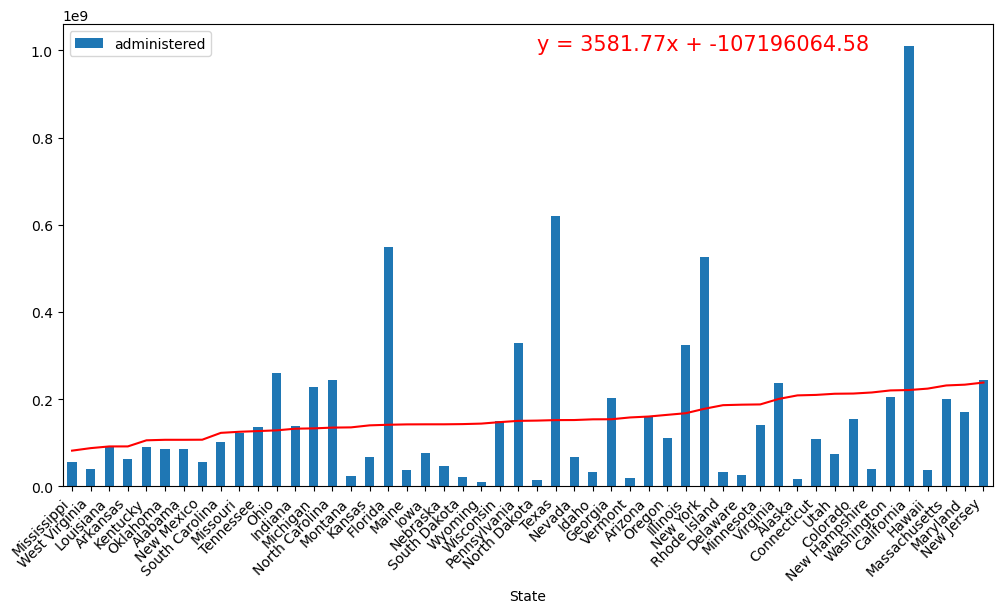

In [208]:
fig, ax = plt.subplots(figsize=(12, 6))

merged_df.plot('State', 'administered', kind = 'bar', ax=ax)
plt.plot(merged_df['State'], slope * merged_df['Median Income'] + intercept, color='red', label='Linear Regression')
plt.annotate(line_eq,(25,1000000000),fontsize=15,color="red")
plt.xticks(rotation=45, ha='right')

plt.show()